# MNIST Dataset

# Library declaration

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
import keras

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

# Loading dataset

In [5]:
mnist = tensorflow.keras.datasets.mnist


# Dividing data into training and test data

In [17]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

# Shape of train and test data

In [7]:
print("x_train size",x_train.shape)
print("y_train size",y_train.shape)
print("x_test size",x_test.shape)
print("y_test size",y_test.shape)

x_train size (60000, 28, 28)
y_train size (60000,)
x_test size (10000, 28, 28)
y_test size (10000,)


# Visualizing data

In [7]:
print(x_train[0])
print(x_train[0].shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

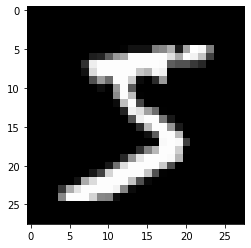

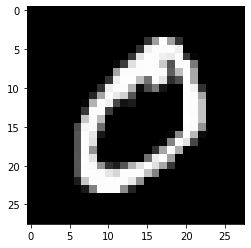

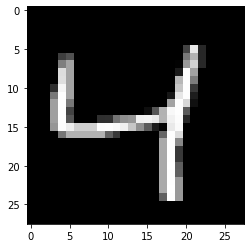

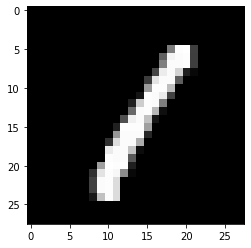

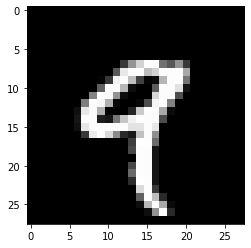

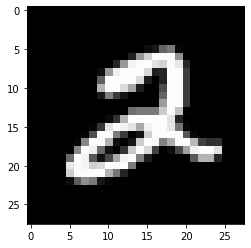

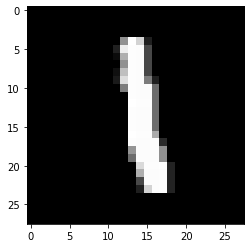

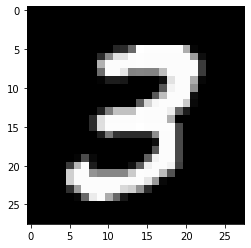

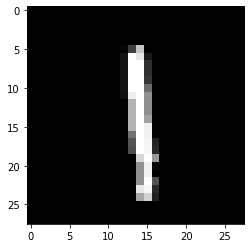

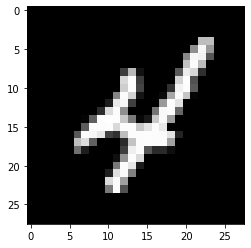

In [8]:
for i in range(10):
  plt.imshow(x_train[i],cmap = 'gray')
  plt.show()



In [18]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)



# Data Augmentation


In [19]:
from keras.preprocessing.image import ImageDataGenerator

In [20]:
train_data = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                width_shift_range=0.1, height_shift_range=0.1
                                   )

In [21]:
train_data.fit(x_train)

In [22]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [23]:
validation_datagen.fit(x_test)

# Creating Model

In [24]:
classifier = Sequential()
classifier.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation = 'relu'))
classifier.add(MaxPooling2D(2, 2))
classifier.add(Conv2D(64, (3,3),  activation = 'relu'))
classifier.add(MaxPooling2D(2, 2))
classifier.add(Dropout(0.2))
classifier.add(Flatten())
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(10, activation='softmax'))
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [15]:
print(classifier.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

# Training the model

In [26]:
history = classifier.fit(train_data.flow(x_train, y_train, batch_size=500),epochs = 10,validation_data = validation_datagen.flow(x_test,y_test,batch_size = 500))

Epoch 1/10
120/120 [==============================] - 66s 554ms/step - loss: 0.1338 - accuracy: 0.9596 - val_loss: 0.0273 - val_accuracy: 0.9877
Epoch 2/10
120/120 [==============================] - 63s 528ms/step - loss: 0.1121 - accuracy: 0.9650 - val_loss: 0.0315 - val_accuracy: 0.9875
Epoch 3/10
120/120 [==============================] - 63s 526ms/step - loss: 0.1010 - accuracy: 0.9693 - val_loss: 0.0228 - val_accuracy: 0.9888
Epoch 4/10
120/120 [==============================] - 65s 542ms/step - loss: 0.0875 - accuracy: 0.9730 - val_loss: 0.0334 - val_accuracy: 0.9905
Epoch 5/10
120/120 [==============================] - 66s 551ms/step - loss: 0.0825 - accuracy: 0.9750 - val_loss: 0.0307 - val_accuracy: 0.9908
Epoch 6/10
120/120 [==============================] - 71s 595ms/step - loss: 0.0753 - accuracy: 0.9766 - val_loss: 0.0305 - val_accuracy: 0.9913
Epoch 7/10
120/120 [==============================] - 70s 583ms/step - loss: 0.0698 - accuracy: 0.9782 - val_loss: 0.0137 - val_ac

# Saving the model

In [27]:
classifier.save('my_model.h5')

# Visualizing x_test data and model's predicted value

In [35]:
predictions = classifier.predict(x_test)

In [36]:
x_test = x_test.reshape(10000,28,28)

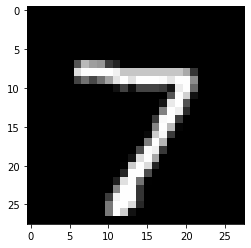

In [37]:
plt.imshow(x_test[0],cmap = 'gray')

In [38]:
predictions[0]

array([4.0583834e-09, 8.3123880e-10, 8.9744482e-08, 8.3129561e-07,
       4.5672099e-10, 1.0755087e-08, 7.8233042e-13, 9.9999809e-01,
       9.2881599e-08, 8.7371723e-07], dtype=float32)

In [39]:
print(np.argmax(predictions[0]))

7


# Visualizing the loss and accuracy

Text(0.5, 0, 'epoch')

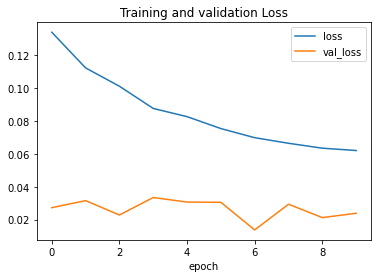

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Training and validation Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

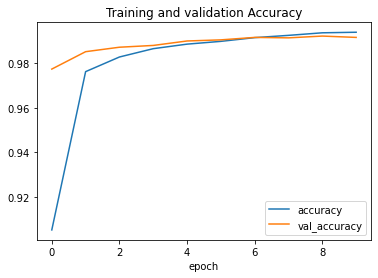

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Training and validation Accuracy')
plt.xlabel('epoch')

# Front end

## Libraries

In [29]:
from tkinter import *

from PIL  import ImageGrab
from PIL import Image

In [30]:
from keras.models import load_model

In [31]:
import numpy as np

## Loading the model

In [32]:
model = load_model('my_model.h5')

In [ ]:

def empty():
    canv.old = None
    canv.delete('all')
    text_var.set("")

def paint(event):
    x, y = event.x, event.y
    if canv.old:
        x1, y1 = canv.old
        canv.create_line(x, y, x1, y1,fill = 'white',width = 15,capstyle=ROUND)
        
    canv.old = x, y

    


def mainfun():

    
    #ps = canv.postscript(colormode = 'color')
   
    #im = Image.open(io.BytesIO(ps.encode('utf-8')))
    #im.save('pic.jpg')
    
    
    
    ImageGrab.grab().crop((80,90,430,450)).save("C:\\Users\\B V K Raju\\img.png")
  
    img = Image.open("C:\\Users\\B V K Raju\\img.png")
        
    img = img.resize((28,28))
    
    img = img.convert('L')
    
    img.save("img.png")
    
    res_arr = np.array(img)
        
    res_arr = res_arr.reshape(1,28,28,1)
    
    res_arr = res_arr/255
        
    prediction = model.predict(res_arr)
        
    x = np.argmax(prediction)
    
    text_var.set(str(x))

    
    
    


win = Tk()

lab =  Label(win,text = "Draw the digit below ",font = 10 ).place(x =50,y = 10)

canv =  Canvas(win,width = '300',height = '300',bg = 'Black')
canv.place(x =50,y =50)
canv.old= None
canv.bind('<Button1-Motion>',paint)



lab =Label(win,text="Handwritten digit is:",font = 7).place(x = 50,y = 400)

text_var =StringVar()
textdisplay = Entry(win,width = '10',justify = 'center',textvariable = text_var,font=  5)
textdisplay.place(x = 250 ,y = 400,height = 35)

bt1 =   Button(win,text = 'empty',font = 5,bg = 'black',fg = 'white',width = '7',height = '1',command = empty).place(x = 50,y = 500 )

bt2 =   Button(win,text = 'submit',font =5,bg = 'black',fg = 'white',width = '7',height = '1',command = mainfun).place(x = 250,y = 500)

win.geometry('600x600')

win.mainloop()